In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder
from collections import defaultdict
from sklearn.model_selection import train_test_split

EDA

In [2]:
df=pd.read_csv('DiseaseAndSymptoms.csv')

In [3]:
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Disease       4920 non-null   object
 1   Symptom_1     4920 non-null   object
 2   Symptom_2     4920 non-null   object
 3   Symptom_3     4920 non-null   object
 4   Symptom_4     4572 non-null   object
 5   Symptom_5     3714 non-null   object
 6   Symptom_6     2934 non-null   object
 7   Symptom_7     2268 non-null   object
 8   Symptom_8     1944 non-null   object
 9   Symptom_9     1692 non-null   object
 10  Symptom_10    1512 non-null   object
 11  Symptom_11    1194 non-null   object
 12  Symptom_12    744 non-null    object
 13  Symptom_13    504 non-null    object
 14  Symptom_14    306 non-null    object
 15  Symptom_15    240 non-null    object
 16  Symptom_16    192 non-null    object
 17  Symptom_17    72 non-null     object
 18  symptom       4920 non-null   object
 19  sympto

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, ' acidity'),
  Text(1, 0, ' back_pain'),
  Text(2, 0, ' bladder_discomfort'),
  Text(3, 0, ' breathlessness'),
  Text(4, 0, ' burning_micturition'),
  Text(5, 0, ' chest_pain'),
  Text(6, 0, ' chills'),
  Text(7, 0, ' constipation'),
  Text(8, 0, ' continuous_sneezing'),
  Text(9, 0, ' cough'),
  Text(10, 0, ' cramps'),
  Text(11, 0, ' fatigue'),
  Text(12, 0, ' headache'),
  Text(13, 0, ' high_fever'),
  Text(14, 0, ' indigestion'),
  Text(15, 0, ' joint_pain'),
  Text(16, 0, ' mood_swings'),
  Text(17, 0, ' muscle_wasting'),
  Text(18, 0, ' muscle_weakness'),
  Text(19, 0, ' neck_pain'),
  Text(20, 0, ' pain_during_bowel_movements'),
  Text(21, 0, ' patches_in_throat'),
  Text(22, 0, ' pus_filled_pimples'),
  Text(23, 0, ' shivering'),
  Text(24, 0, ' skin_rash'),
  Text(25, 0, ' stiff_neck'),
  Text(26, 0, ' stomach_pa

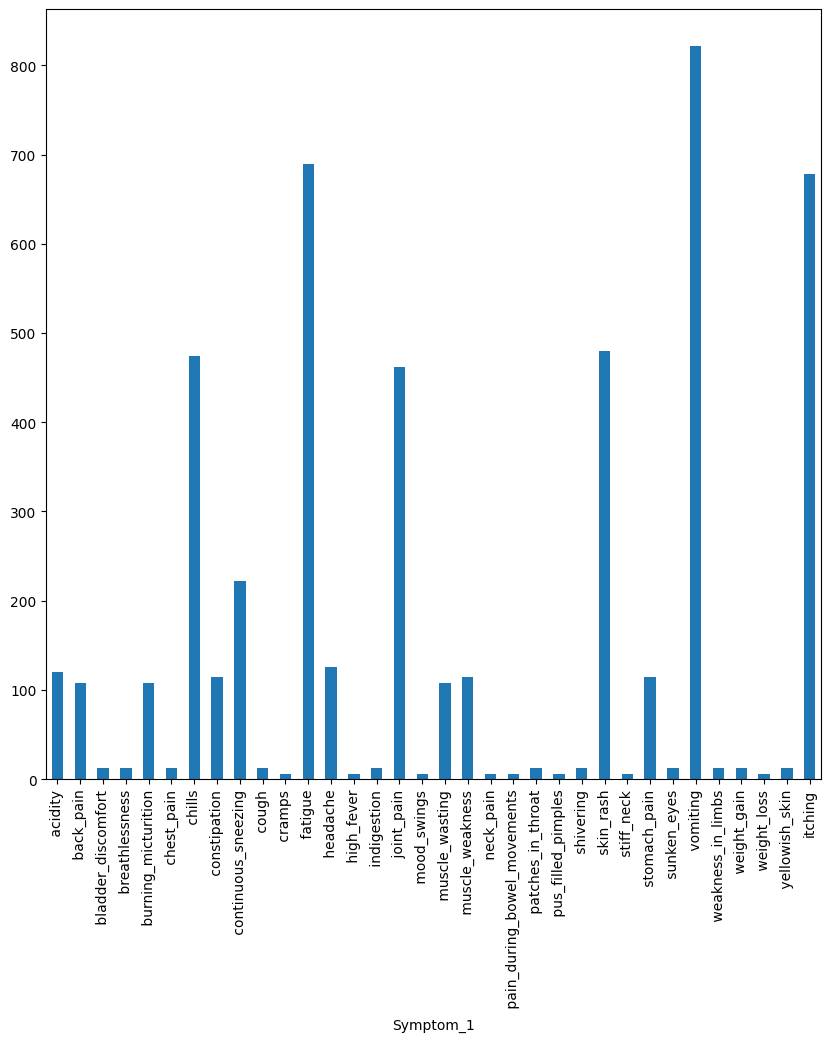

In [4]:
df.groupby(['Symptom_1']).size().plot(kind='bar',figsize=(10,10))
plt.xticks(rotation=90)

In [5]:
label=np.array(df['Disease'].unique())

In [6]:
len(df['Disease'].unique())

41

Preprocessing


In [7]:
df['symptom']=df[df.columns[1:]].apply(
    lambda row: ', '.join((str(x) for x in row if pd.notna(x))),
    axis=1
)

In [8]:
mlb = MultiLabelBinarizer()
le = LabelEncoder()
df['symptom_list'] = df['symptom'].apply(lambda x: [i.strip().lower() for i in x.split(',') if i.strip() != ''])
symptom_ohe = pd.DataFrame(mlb.fit_transform(df['symptom_list']), columns=mlb.classes_)
df['disease_code']=le.fit_transform(df['Disease'])
better_dummy = pd.concat([df['disease_code'], symptom_ohe], axis=1)

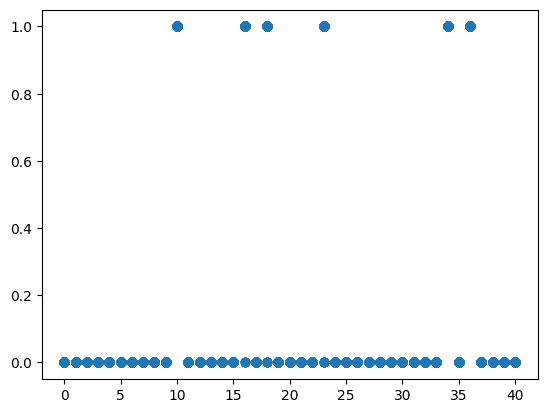

In [9]:
plt.scatter(better_dummy['disease_code'],better_dummy['chest_pain'])

In [10]:
better_dummy.head()

,disease_code,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,...,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
feature=symptom_ohe.columns
label=better_dummy['disease_code'].unique()

In [12]:
y=np.array(better_dummy['disease_code'])
x=np.array(symptom_ohe)

In [13]:
x.shape

(4920, 131)

In [14]:
y.shape

(4920,)

In [15]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=42)

Naive Bayes



In [16]:
def prior_probabilty(data):
  size=len(data)
  prob=dict()
  for i in data:
    try:
      prob[i]+=1
    except Exception:
      prob[i]=1
  prior={cls:count/size for cls,count in prob.items()}
  return prior

In [17]:
def likelihoods(x,y,num_feature):
  likelihoods = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
  count_label =dict()
  for ft,label in zip(x,y):
    try:
      count_label[label]+=1
    except Exception:
      count_label[label]=1
    for i in range(num_feature):
      val=ft[i]
      likelihoods[label][i][val]+=1
  for label in likelihoods:
    for i in range(num_feature):
      for val in [0, 1]:
          count = likelihoods[label][i][val]
          likelihoods[label][i][val] = (count + 1) / (count_label[label] + 2)
  return likelihoods

In [18]:
def predict(symptom,prior,likelihood,num_feature):
  max_prob = -math.inf
  best_class = None
  for i in prior:
    prob=math.log(prior[i])
    for j in range(num_feature):
      val=symptom[j]
      prob+=math.log(likelihood[i][j][val])
    if prob>max_prob:
      max_prob=prob
      best_class=i
  return best_class

In [19]:
def predict_batch(symptoms, prior, likelihood, num_features):
    return [predict(symptom, prior, likelihood, num_features) for symptom in symptoms]

In [20]:
xtrain,ytrain=xtrain.tolist(),ytrain.tolist()

In [21]:
size=x.shape[1]

In [22]:
prior=prior_probabilty(ytrain)
likelihoods_dict=likelihoods(xtrain,ytrain,size)

In [23]:
xtest=xtest.tolist()

In [24]:
pred=predict_batch(xtest,prior,likelihoods_dict,size)

In [25]:
correct = torch.eq(torch.tensor(ytest), torch.tensor(pred)).sum().item()
acc = (correct / len(ytest)) * 100

In [26]:
acc

100.0

Dynamic prediction

In [27]:
def predictv2(symptom, prior, likelihood, num_feature):
  probabilities={}
  for i in prior:
      prob = math.log(prior[i])
      for j in range(num_feature):
          val = symptom[j]
          if val !=-1:
              prob +=math.log(likelihood[i][j][val])
      probabilities[i]= prob
  best_class = max(probabilities, key=probabilities.get)
  return best_class, probabilities

In [28]:
def calculate_information_gain(current_state, priors, likelihoods, num_features):
  symptoms_asked= [i for i, val in enumerate(current_state) if val != -1]

  best_gain=-float('inf')
  best_feature=None
  for feature in range(num_features):
      if feature in symptoms_asked:
          continue
      entropy_before=calculate_entropy(current_state, priors, likelihoods, num_features)

      entropy_after=0
      for val in [0, 1]:
          temp_state = current_state.copy()
          temp_state[feature] = val
          p_val = estimate_feature_probability(feature, val, current_state, priors, likelihoods, num_features)
          entropy_after +=p_val * calculate_entropy(temp_state, priors, likelihoods, num_features)

      gain = entropy_before - entropy_after

      if gain > best_gain:
          best_gain=gain
          best_feature=feature

  return best_feature

In [29]:
def calculate_entropy(state, priors, likelihoods, num_features):
  probabilities=get_disease_probabilities(state, priors, likelihoods, num_features)
  entropy = 0
  for p in probabilities.values():
      if p > 0:
          entropy -= p * math.log(p)
  return entropy

In [30]:
def get_disease_probabilities(state, priors, likelihoods, num_features):
  unnormalized={}
  for disease in priors:
      prob = math.log(priors[disease])
      for feature in range(num_features):
          val = state[feature]
          if val != -1:
              prob += math.log(likelihoods[disease][feature][val])
      unnormalized[disease] = math.exp(prob)

  total=sum(unnormalized.values())
  return {disease: p/total for disease, p in unnormalized.items()}

In [31]:
def estimate_feature_probability(feature, value, state, priors, likelihoods, num_features):
  probs = get_disease_probabilities(state, priors, likelihoods, num_features)
  p_feature_val = 0
  for disease, prob in probs.items():
      p_feature_val += prob * likelihoods[disease][feature][value]
  return p_feature_val

In [36]:
def run(symptom_names, priors, likelihoods, num_features):
  current_state=[-1] * num_features
  asked_questions = 0
  max_questions = 20


  while asked_questions < max_questions:
      disease_probs=get_disease_probabilities(current_state, priors, likelihoods, num_features)

      most_likely_disease = max(disease_probs, key=disease_probs.get)
      confidence = disease_probs[most_likely_disease]

      if confidence > 0.8:
          break

      next_feature=calculate_information_gain(current_state, priors, likelihoods, num_features)

      if next_feature is None:
          break

      response=input(f"Do you have {symptom_names[next_feature]}? (yes/no): ").lower()

      if response=="yes":
          current_state[next_feature] = 1
      elif response=="no":
          current_state[next_feature] = 0
      else:
          print("Please answer with 'yes' or 'no'.")
          continue

      asked_questions+=1

      print(f"\nBased on your answers so far, I'm {confidence*100:.1f}% confident patient might have {le.inverse_transform([most_likely_disease])}.")
      if asked_questions < max_questions:
          print("Let me ask another question to be more certain.\n")

  final_diagnosis,_ = predictv2(current_state, priors, likelihoods, num_features)
  probability = disease_probs[final_diagnosis] * 100

  print("\n=== Diagnosis Result ===")
  print(f"Based on your symptoms, I believe patient have: {le.inverse_transform([final_diagnosis])}")
  print(f"Confidence: {probability:.1f}%")

  return final_diagnosis, probability

In [38]:
run(feature,prior,likelihoods_dict,size)

Do you have fatigue? (yes/no): yes

Based on your answers so far, I'm 2.7% confident patient might have ['Chronic cholestasis'].
Let me ask another question to be more certain.

Do you have loss_of_appetite? (yes/no): no

Based on your answers so far, I'm 6.4% confident patient might have ['Typhoid'].
Let me ask another question to be more certain.

Do you have high_fever? (yes/no): yes

Based on your answers so far, I'm 10.6% confident patient might have ['Typhoid'].
Let me ask another question to be more certain.

Do you have chest_pain? (yes/no): no

Based on your answers so far, I'm 22.3% confident patient might have ['Typhoid'].
Let me ask another question to be more certain.

Do you have chills? (yes/no): yes

Based on your answers so far, I'm 35.6% confident patient might have ['Typhoid'].
Let me ask another question to be more certain.


=== Diagnosis Result ===
Based on your symptoms, I believe patient have: ['Typhoid']
Confidence: 95.0%


(37, 94.98440255818377)